# Clustering Algorithms - Overview

### Loading Libraries

In [3]:
# Numerical Computing
import numpy as np
from numpy.random import rand, seed

# Data Manipulation
import pandas as pd

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Warnings
from warnings import filterwarnings

# Scikit-Learn
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.datasets import make_blobs, make_circles, make_moons
from sklearn.cluster import KMeans, SpectralClustering, DBSCAN, AgglomerativeClustering

In [4]:
%matplotlib inline

In [5]:
seed(42)

sns.set_style('white')

filterwarnings('ignore')

In [6]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]

cmap = ListedColormap(sns.color_palette(flatui))

## Generate Synthetic Datasets

In [7]:
n_samples = 1500

random_state = 170

In [8]:
blobs = make_blobs(n_samples=n_samples, 
                   random_state=random_state)

In [9]:
noisy_circles = make_circles(n_samples=n_samples, 
                             factor=.5, 
                             noise=.05)

In [10]:
noisy_moons = make_moons(n_samples=n_samples, 
                         noise=.05)

In [11]:
uniform = rand(n_samples, 2), None

In [12]:
X, y = make_blobs(n_samples=n_samples, 
                  random_state=random_state)

In [13]:
elongated = X.dot([[0.6, -0.6], [-0.4, 0.8]]), y

In [14]:
varied = make_blobs(n_samples=n_samples,
                    cluster_std=[1.0, 2.5, 0.5],
                    random_state=random_state)

In [15]:
default_params = {'quantile': .3,
                  'eps': .2,
                  'damping': .9,
                  'preference': -200,
                  'n_neighbors': 10,
                  'n_clusters': 3}

In [16]:
datasets = [('Standard Normal', blobs, {}),
            ('Various Normal', varied, {'eps': .18, 'n_neighbors': 2}),
            ('Anisotropic Normal', elongated, {'eps': .15, 'n_neighbors': 2}),
            ('Uniform', uniform, {}),
            ('Circles', noisy_circles, {'damping': .77, 'preference': -240,
                                        'quantile': .2, 'n_clusters': 2}),
            ('Moons', noisy_moons, {'damping': .75,
                                    'preference': -220, 'n_clusters': 2})]

### Plotting Cluster Algorithm Results

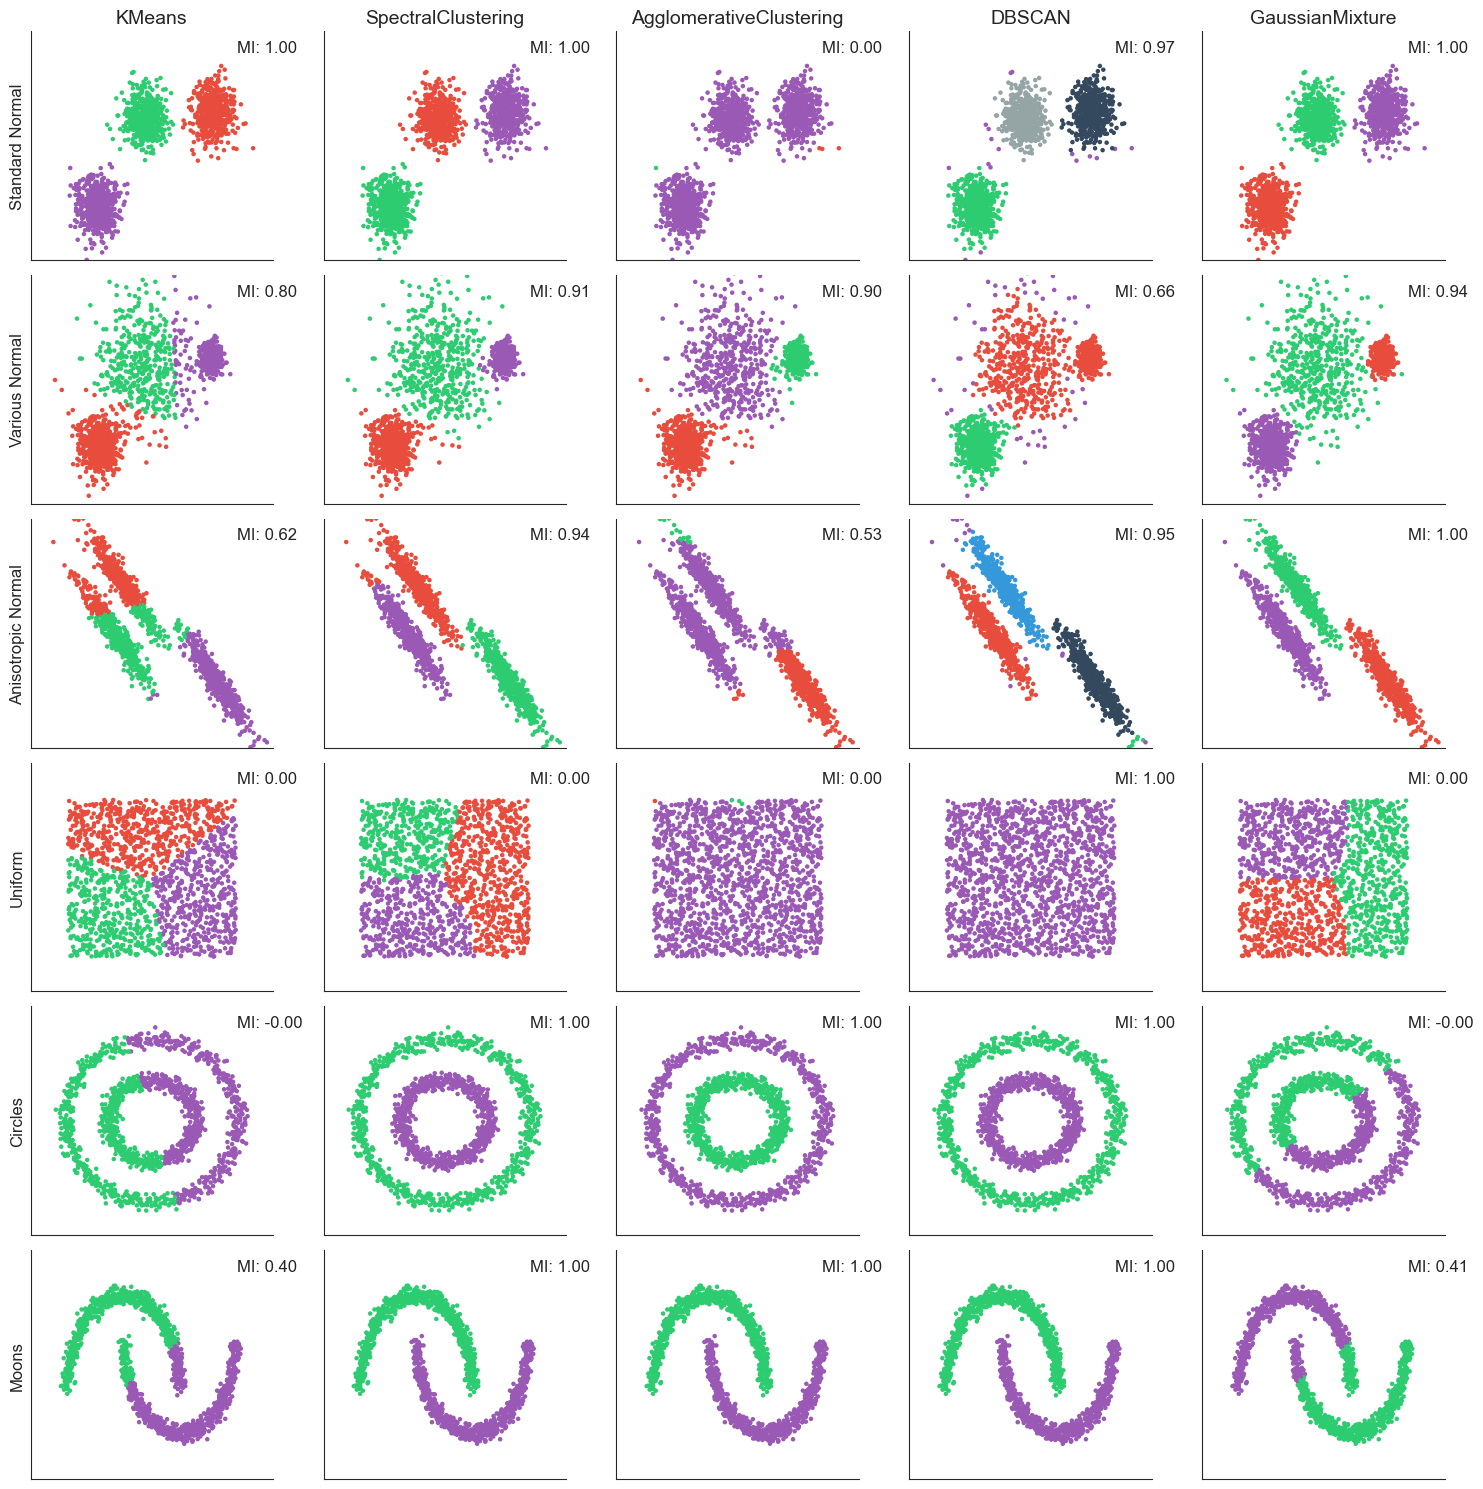

In [19]:
fig, axes = plt.subplots(figsize=(15, 15),
                         ncols=5,
                         nrows=len(datasets),
                         sharey=True,
                         sharex=True)

plt.setp(axes, xticks=[], yticks=[], xlim=(-2.5, 2.5), ylim=(-2.5, 2.5))

for d, (dataset_label, dataset, algo_params) in enumerate(datasets):
    params = default_params.copy()
    params.update(algo_params)

    X, y = dataset
    X = StandardScaler().fit_transform(X)

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(X, n_neighbors=params['n_neighbors'],
                                    include_self=False)
    connectivity = 0.5 * (connectivity + connectivity.T)

    kmeans = KMeans(n_clusters=params['n_clusters'])

    spectral = SpectralClustering(n_clusters=params['n_clusters'],
                                  eigen_solver='arpack',
                                  affinity='nearest_neighbors')

    dbscan = DBSCAN(eps=params['eps'])
    average_linkage = AgglomerativeClustering(linkage="average",
                                          metric="cityblock",
                                          n_clusters=params['n_clusters'],
                                          connectivity=connectivity)

    gmm = GaussianMixture(n_components=params['n_clusters'],
                          covariance_type='full')

    clustering_algorithms = (('KMeans', kmeans),
                             ('SpectralClustering', spectral),
                             ('AgglomerativeClustering', average_linkage),
                             ('DBSCAN', dbscan),
                             ('GaussianMixture', gmm))

    for a, (name, algorithm) in enumerate(clustering_algorithms):

        if name == 'GaussianMixture':
            algorithm.fit(X)
            y_pred = algorithm.predict(X)
        else:
            y_pred = algorithm.fit_predict(X)

        axes[d, a].scatter(X[:, 0], 
                           X[:, 1], 
                           s=5, 
                           c=y_pred, 
                           cmap=cmap)
        
        if d == 0:
            axes[d, a].set_title(name, size=14)
        if a == 0:
            axes[d, a].set_ylabel(dataset_label, size=12)

        if y is None:
            y = [.5] * n_samples
        mi = adjusted_mutual_info_score(labels_pred=y_pred, 
                                        labels_true=y)
        axes[d, a].text(0.85, 0.91, 
                        f'MI: {mi:.2f}', 
                        transform=axes[d, a].transAxes, 
                        fontsize=12)
        axes[d, a].axes.get_xaxis().set_visible(False)

sns.despine()
fig.tight_layout()
plt.show()